In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-rin

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### There are no null values

In [7]:
for i in df.columns:
    print(i,'->',df[i].unique())

class -> ['p' 'e']
cap-shape -> ['x' 'b' 's' 'f' 'k' 'c']
cap-surface -> ['s' 'y' 'f' 'g']
cap-color -> ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises -> ['t' 'f']
odor -> ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment -> ['f' 'a']
gill-spacing -> ['c' 'w']
gill-size -> ['n' 'b']
gill-color -> ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape -> ['e' 't']
stalk-root -> ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring -> ['s' 'f' 'k' 'y']
stalk-surface-below-ring -> ['s' 'f' 'y' 'k']
stalk-color-above-ring -> ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring -> ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type -> ['p']
veil-color -> ['w' 'n' 'o' 'y']
ring-number -> ['o' 't' 'n']
ring-type -> ['p' 'e' 'l' 'f' 'n']
spore-print-color -> ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population -> ['s' 'n' 'a' 'v' 'y' 'c']
habitat -> ['u' 'g' 'm' 'd' 'p' 'w' 'l']


### veil-type has normal one unique value, so dropping it

In [8]:
df.drop('veil-type', axis=1, inplace=True)

### All feature are object type, we are converting it into integer type by doing Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
encoder

LabelEncoder()

In [11]:
for i in df.columns:
    df[i]=encoder.fit_transform(df[i])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [13]:
for i in df.columns:
    print(i,'->',df[i].unique())


class -> [1 0]
cap-shape -> [5 0 4 2 3 1]
cap-surface -> [2 3 0 1]
cap-color -> [4 9 8 3 2 5 0 7 1 6]
bruises -> [1 0]
odor -> [6 0 3 5 2 1 8 7 4]
gill-attachment -> [1 0]
gill-spacing -> [0 1]
gill-size -> [1 0]
gill-color -> [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-shape -> [0 1]
stalk-root -> [3 2 1 4 0]
stalk-surface-above-ring -> [2 0 1 3]
stalk-surface-below-ring -> [2 0 3 1]
stalk-color-above-ring -> [7 3 6 4 0 2 5 1 8]
stalk-color-below-ring -> [7 6 3 0 4 2 8 5 1]
veil-color -> [2 0 1 3]
ring-number -> [1 2 0]
ring-type -> [4 0 2 1 3]
spore-print-color -> [2 3 6 1 7 5 4 8 0]
population -> [3 2 0 4 5 1]
habitat -> [5 1 3 0 4 6 2]


In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


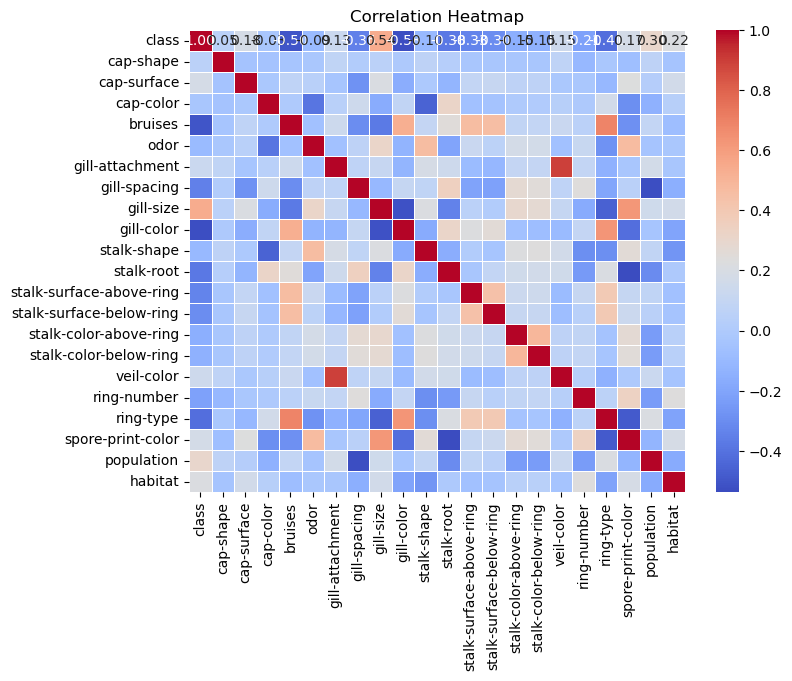

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [17]:
### Gill color has high covariacne, so we can say that it is an important feature

In [18]:
X=df.drop('class',axis=1)
y=df['class']

In [19]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


In [20]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5443, 21), (2681, 21), (5443,), (2681,))

In [23]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [24]:
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [25]:
X_train_scaled

array([[ 1.03301562, -1.47386737,  1.39140783, ..., -0.25996003,
        -2.95291052, -0.29972955],
       [-0.84017839,  0.95859476,  1.78528306, ..., -1.09548553,
         1.08504847,  1.44386995],
       [-0.84017839,  0.14777405,  1.39140783, ..., -0.25996003,
        -0.53013513,  2.02506978],
       ...,
       [-0.84017839,  0.95859476, -0.57796829, ..., -1.09548553,
         1.08504847, -0.29972955],
       [-0.21578039,  0.14777405, -0.57796829, ...,  1.41109097,
        -1.33772692, -0.29972955],
       [-0.84017839,  0.14777405,  1.39140783, ..., -0.67772278,
        -2.95291052, -0.29972955]])

In [26]:
X_test_scaled

array([[ 1.03301562,  0.95859476,  1.39140783, ..., -0.67772278,
        -1.33772692, -0.29972955],
       [-0.84017839,  0.14777405, -0.18409307, ..., -0.67772278,
        -0.53013513,  2.02506978],
       [ 1.03301562,  0.14777405,  1.39140783, ..., -0.67772278,
        -0.53013513, -0.29972955],
       ...,
       [-0.21578039,  0.95859476, -0.97184352, ...,  1.41109097,
         0.27745667,  1.44386995],
       [-0.84017839,  0.95859476, -0.97184352, ...,  1.41109097,
         0.27745667, -0.88092938],
       [-0.84017839,  0.95859476, -0.18409307, ...,  1.41109097,
         0.27745667, -0.88092938]])

# Model Training

### Multilinear Regression

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression()
regression

LinearRegression()

In [29]:
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [30]:
## slopes of feature
regression.coef_

array([-0.0020628 ,  0.02923311, -0.0062409 , -0.16609341, -0.04491551,
        0.00572135, -0.16746138,  0.24862441, -0.03779339, -0.03264473,
       -0.07835614, -0.10263999, -0.03941427, -0.0202947 , -0.01282348,
        0.08247152,  0.00620676,  0.03392424, -0.11287096, -0.0125854 ,
        0.0261325 ])

In [31]:
regression.intercept_

0.48557780635678854

In [32]:
y_pred_test=regression.predict(X_test_scaled)

In [33]:
## Performance metrics cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_test))
print(mean_absolute_error(y_test,y_pred_test))
print(np.sqrt(mean_squared_error(y_test,y_pred_test)))

0.06365006039041664
0.16786650815324736
0.25228963591558146


In [34]:
## R square and Adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.7447525632220096


### LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [36]:
## Prediction
y_pred=classifier.predict(X_test_scaled)

In [37]:
## Performance metrics cost function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.04401342782543827
0.04401342782543827
0.20979377451544712


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[1354   64]
 [  54 1209]]
0.9559865721745617
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1418
           1       0.95      0.96      0.95      1263

    accuracy                           0.96      2681
   macro avg       0.96      0.96      0.96      2681
weighted avg       0.96      0.96      0.96      2681



### DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier
## Post Pruning 
treeclassifier=DecisionTreeClassifier()
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.39903846153846156, 0.9375, 'x[8] <= 3.5\ngini = 0.5\nsamples = 5443\nvalue = [2800.0, 2643.0]'),
 Text(0.19230769230769232, 0.8125, 'x[19] <= 3.5\ngini = 0.278\nsamples = 2256\nvalue = [377, 1879]'),
 Text(0.07692307692307693, 0.6875, 'x[18] <= 1.5\ngini = 0.2\nsamples = 400\nvalue = [355, 45]'),
 Text(0.038461538461538464, 0.5625, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.11538461538461539, 0.5625, 'x[7] <= 0.5\ngini = 0.078\nsamples = 370\nvalue = [355, 15]'),
 Text(0.07692307692307693, 0.4375, 'gini = 0.0\nsamples = 355\nvalue = [355, 0]'),
 Text(0.15384615384615385, 0.4375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3076923076923077, 0.6875, 'x[10] <= 2.0\ngini = 0.023\nsamples = 1856\nvalue = [22, 1834]'),
 Text(0.2692307692307692, 0.5625, 'x[12] <= 0.5\ngini = 0.01\nsamples = 1843\nvalue = [9, 1834]'),
 Text(0.23076923076923078, 0.4375, 'x[20] <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [9, 19]'),
 Text(0.19230769230769232, 0.3125, 'gini = 0.0\nsamp

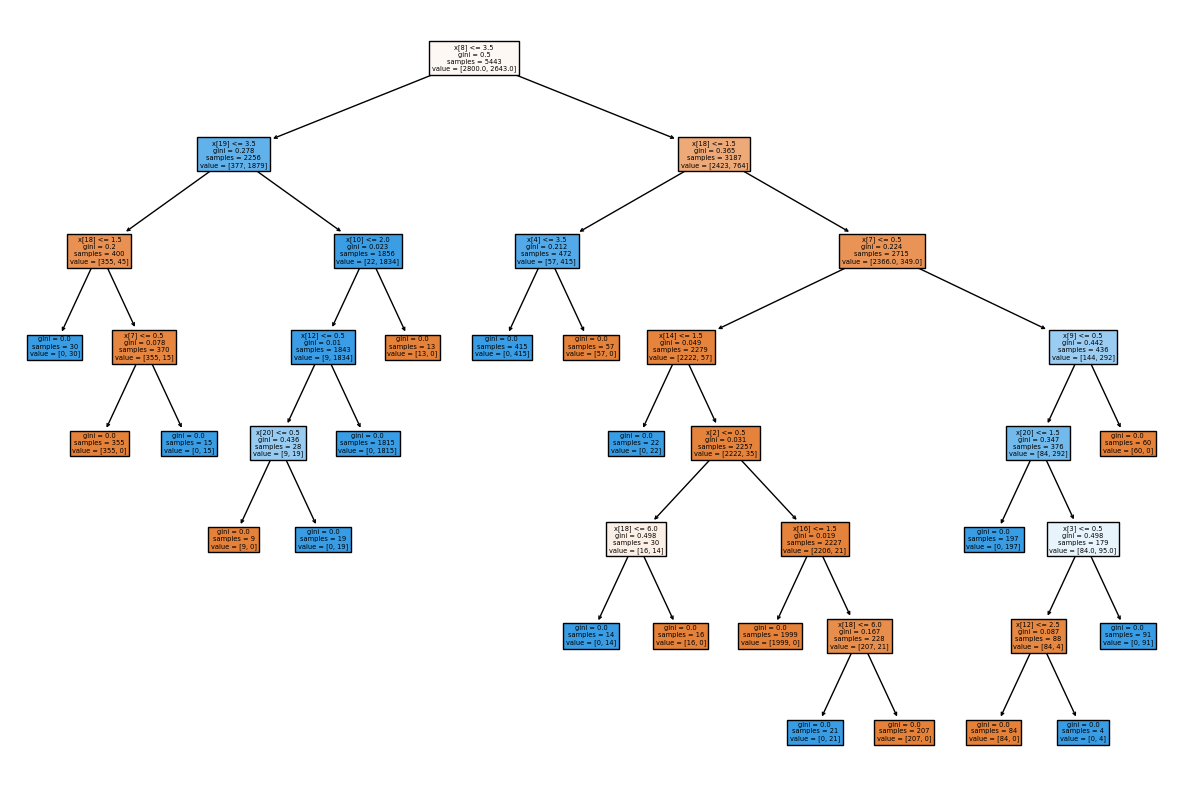

In [40]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

[Text(0.5, 0.8333333333333334, 'x[8] <= 3.5\ngini = 0.5\nsamples = 5443\nvalue = [2800.0, 2643.0]'),
 Text(0.25, 0.5, 'x[19] <= 3.5\ngini = 0.278\nsamples = 2256\nvalue = [377, 1879]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.2\nsamples = 400\nvalue = [355, 45]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.023\nsamples = 1856\nvalue = [22, 1834]'),
 Text(0.75, 0.5, 'x[18] <= 1.5\ngini = 0.365\nsamples = 3187\nvalue = [2423, 764]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.212\nsamples = 472\nvalue = [57, 415]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.224\nsamples = 2715\nvalue = [2366.0, 349.0]')]

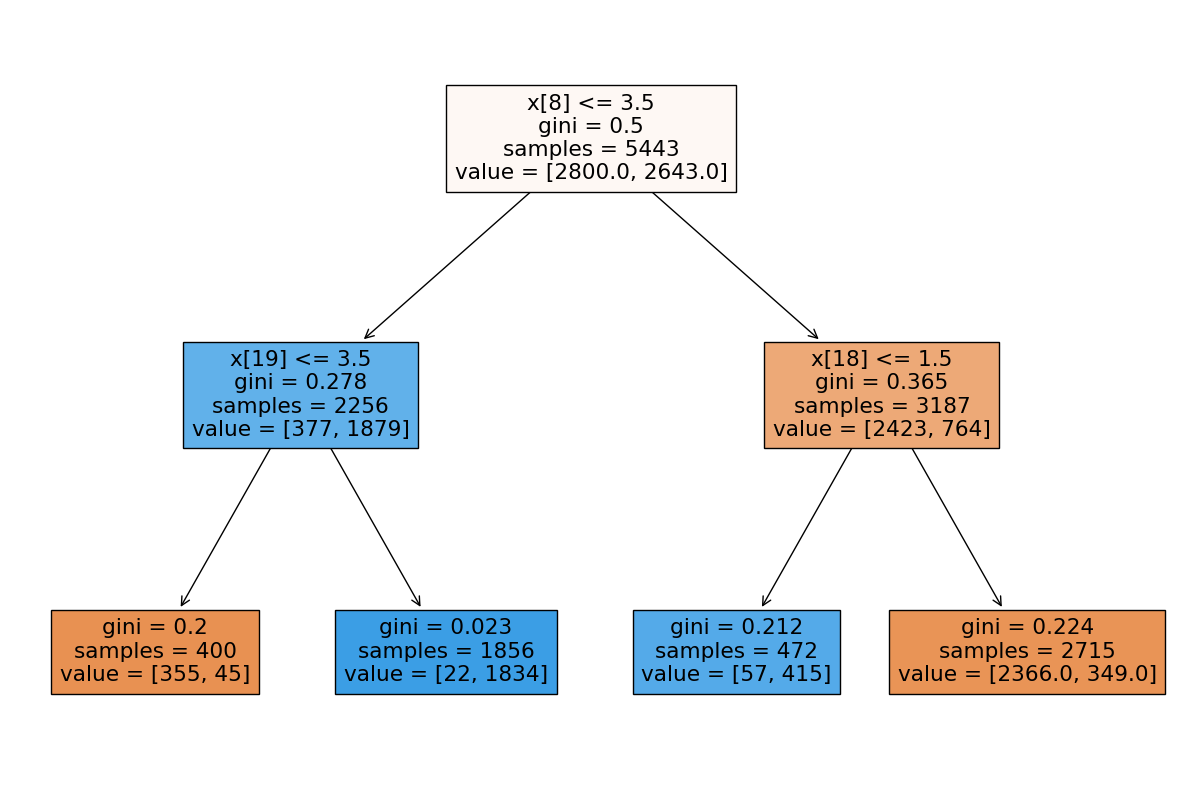

In [41]:
## Post Pruning  with max_depth=2
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [42]:
## Prediction 
y_pred=treeclassifier.predict(X_test)

In [43]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.9063782170831779
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1577
           1       0.84      0.96      0.89      1104

    accuracy                           0.91      2681
   macro avg       0.90      0.91      0.91      2681
weighted avg       0.91      0.91      0.91      2681



[Text(0.5, 0.8333333333333334, 'x[8] <= 3.5\ngini = 0.5\nsamples = 5443\nvalue = [2800.0, 2643.0]'),
 Text(0.25, 0.5, 'x[19] <= 3.5\ngini = 0.278\nsamples = 2256\nvalue = [377, 1879]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.2\nsamples = 400\nvalue = [355, 45]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.023\nsamples = 1856\nvalue = [22, 1834]'),
 Text(0.75, 0.5, 'x[18] <= 1.5\ngini = 0.365\nsamples = 3187\nvalue = [2423, 764]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.212\nsamples = 472\nvalue = [57, 415]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.224\nsamples = 2715\nvalue = [2366.0, 349.0]')]

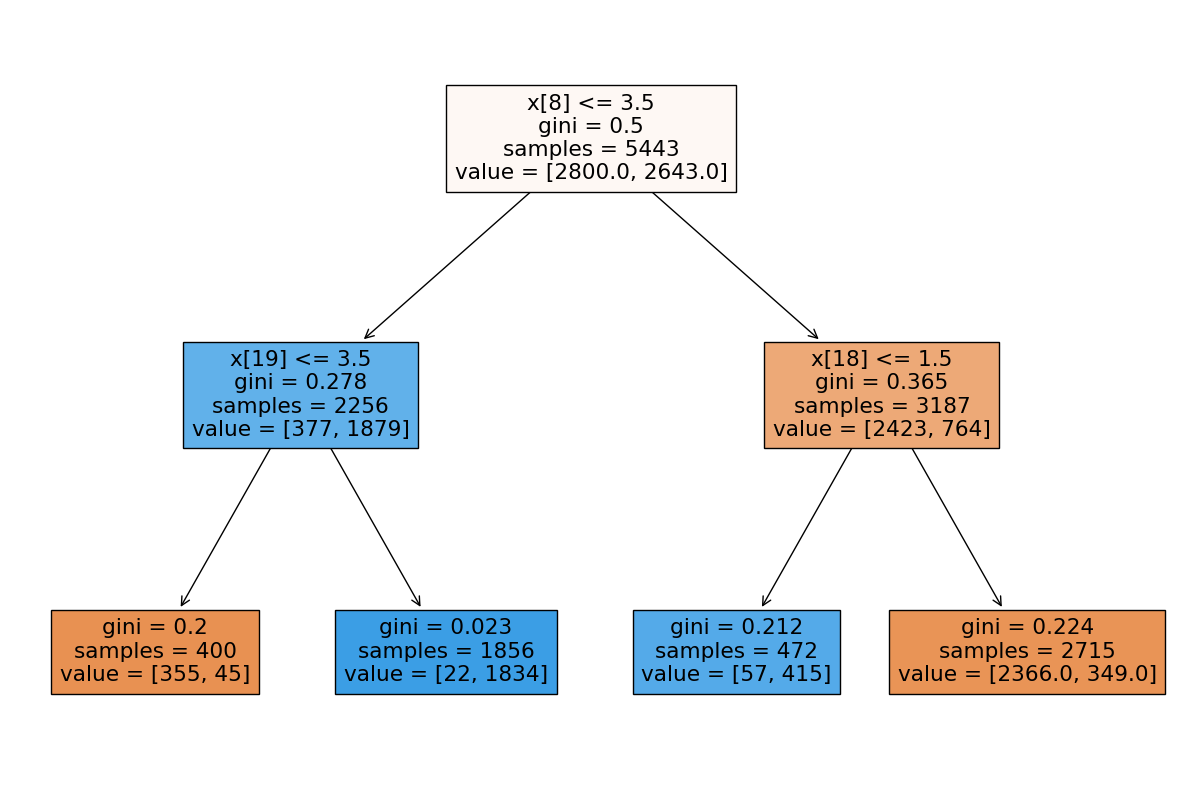

In [44]:
## Post Pruning  with max_depth=2
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(X_train,y_train)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [45]:
## Prediction 
y_pred=treeclassifier.predict(X_test)

In [46]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.9063782170831779
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1577
           1       0.84      0.96      0.89      1104

    accuracy                           0.91      2681
   macro avg       0.90      0.91      0.91      2681
weighted avg       0.91      0.91      0.91      2681



### SVC

In [47]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
print(svc.coef_)
y_pred=svc.predict(X_test)

[[ 1.07725337e-03  1.28151198e-02 -2.54838306e-02  1.91721297e+00
  -2.07088380e-03 -2.03991904e+00 -4.73435684e+00  5.29614017e+00
  -2.36717676e-03 -3.34172937e+00 -3.25903771e+00 -1.84216719e+00
  -9.00023223e-01 -3.13874318e-03 -1.52165073e-03  7.00749934e+00
  -2.22367950e+00  1.02715428e+00 -9.97328057e-02 -3.81331004e-02
   1.62880149e-03]]


In [48]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1408
           1       0.98      0.95      0.97      1273

    accuracy                           0.97      2681
   macro avg       0.97      0.97      0.97      2681
weighted avg       0.97      0.97      0.97      2681

[[1383   25]
 [  60 1213]]
0.9682954121596419


## Conclusion

#### Multilinear Regression gave accuracy of 0.7447525632220096
#### LogisticRegression gave accuracy of 0.9559865721745617
#### DecisionTreeClassifier gave accuracy of 0.9063782170831779
#### SVC gave accuracy of 0.9682954121596419

In [49]:
import pickle
pickle.dump(svc, open('svc.pickle','wb'))

# Gradio

In [75]:
import gradio as gr
input_features = {'cap-shape': ['bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'], 
                  'cap-surface': ['fibrous', 'grooves', 'scaly', 'smooth'], 
                  'cap-color': ['brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 'red', 'white', 'yellow'], 
                  'bruises': ['bruises', 'no'], 
                  'odor': ['almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy'], 
                  'gill-attachment': ['attached', 'free'], 
                  'gill-spacing': ['close', 'crowded'],         
                  'gill-size': ['broad', 'narrow'],                   
                  'gill-color': ['black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'], 
                  'stalk-shape': ['enlarging', 'tapering'], 
                  'stalk-root': ['bulbous', 'club', 'equal', 'rooted', 'missing'], 
                  'stalk-surface-above-ring': ['fibrous', 'scaly', 'silky', 'smooth'], 
                  'stalk-surface-below-ring': ['fibrous', 'scaly', 'silky', 'smooth'], 
                  'stalk-color-above-ring': ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], 
                  'stalk-color-below-ring': ['brown', 'buff', 'cinnamon', 'gray', 'orange', 'pink', 'red', 'white', 'yellow'], 
                  'veil-color': ['brown', 'orange', 'white', 'yellow'], 
                  'ring-number': ['none', 'one', 'two'], 
                  'ring-type': [ 'evanescent', 'flaring', 'large', 'none', 'pendant'], 
                  'spore-print-color': ['black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow'], 
                  'population': ['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'], 
                  'habitat': ['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods']}

# Define the output classes
output_classes = ['p', 'e']

In [76]:
def predict_class(cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, 
                  gill_spacing, gill_size, gill_color, stalk_shape, stalk_root, 
                  stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring, 
                  stalk_color_below_ring, veil_color, ring_number, ring_type, spore_print_color, 
                  population, habitat):
    input_data=[cap_shape, cap_surface, cap_color, bruises, odor, gill_attachment, 
                  gill_spacing, gill_size, gill_color, stalk_shape, stalk_root, 
                  stalk_surface_above_ring, stalk_surface_below_ring, stalk_color_above_ring, 
                  stalk_color_below_ring, veil_color, ring_number, ring_type, spore_print_color, 
                  population, habitat]

    features = [ 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat']
    mushroom_data = {
    'cap-shape': {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'},
    'cap-surface': {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'},
    'cap-color': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'bruises': {'bruises': 't', 'no': 'f'},
    'odor': {'almond': 'a', 'anise': 'l', 'creosote': 'c', 'fishy': 'y', 'foul': 'f', 'musty': 'm', 'none': 'n', 'pungent': 'p', 'spicy': 's'},
    'gill-attachment': {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'},
    'gill-spacing': {'close': 'c', 'crowded': 'w', 'distant': 'd'},
    'gill-size': {'broad': 'b', 'narrow': 'n'},
    'gill-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g', 'green': 'r', 'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'stalk-shape': {'enlarging': 'e', 'tapering': 't'},
    'stalk-root': {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r', 'missing': '?'},
    'stalk-surface-above-ring': {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
    'stalk-surface-below-ring': {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
    'stalk-color-above-ring': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'stalk-color-below-ring': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o', 'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'veil-type': {'partial': 'p', 'universal': 'u'},
    'veil-color': {'brown': 'n', 'orange': 'o', 'white': 'w', 'yellow': 'y'},
    'ring-number': {'none': 'n', 'one': 'o', 'two': 't'},
    'ring-type': {'cobwebby': 'c', 'evanescent': 'e', 'flaring': 'f', 'large': 'l', 'none': 'n', 'pendant': 'p', 'sheathing': 's', 'zone': 'z'},
    'spore-print-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'green': 'r', 'orange': 'o', 'purple': 'u', 'white': 'w', 'yellow': 'y'},
    'population': {'abundant': 'a', 'clustered': 'c', 'numerous': 'n', 'scattered': 's', 'several': 'v', 'solitary': 'y'},
    'habitat': {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 'paths': 'p', 'urban': 'u', 'waste': 'w', 'woods': 'd'}
    }

    encoder=LabelEncoder()
    real_df=pd.read_csv('mushrooms.csv')
    real_df.drop(['class','veil-type'],axis=1,inplace=True)
    encoded_value=[]
    valueforprediction=[]
    for i in range(21):
        valueforprediction.append(mushroom_data[features[i]][input_data[i]])

    random=pd.DataFrame([valueforprediction],columns=features)
    for i in real_df.columns:
        print(i,real_df[i].unique())
        encoder.fit_transform(real_df[i])
        encoded_value.append(encoder.transform(random[i])[0])
    
    prediction=svc.predict([encoded_value])
    class_label = 'poisonous' if prediction == 1 else 'edible'
    return class_label

In [77]:
input_components = [gr.Dropdown(choices=values, label=feature) for feature, values in input_features.items()]

# Create Gradio interface
iface = gr.Interface(
    fn=predict_class,
    inputs=input_components,
    outputs="label",
    title="Mushroom Classifier",
    description="Predict whether a mushroom is poisonous or edible based on its features."
)
iface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
